In [1]:
from collections import defaultdict
import copy
import matplotlib.pyplot as plt
from circuit.parser import get_circuit_duration
from plot.plot import plot_duration_fidelity, plot_top_ratio, find_error_path
import random
import numpy as np

from circuit import gen_random_circuits, label_ground_truth_fidelity
from upstream import RandomwalkModel
from downstream import FidelityModel
from simulator import NoiseSimulator
from utils.backend import devide_chip, gen_grid_topology, get_grid_neighbor_info, Backend, topology_to_coupling_map
from utils.backend import default_basis_single_gates, default_basis_two_gates
import pickle
import seaborn as sns
import pandas as pd

In [6]:
n_qubits_list = [350]

paths = [
    f"simulate_50_350/{n_qubits}/error_params_predicts_{n_qubits}.pkl"
    for n_qubits in n_qubits_list
]

downstream_model_list,  predicts_list, reals_list, durations_lists, test_dataset_list = [], [], [], [], []
# predicts_list, reals_list, durations_lists = [], [], [], []

for path in paths:
    print(path)
    with open(path, "rb")as f:
        # pkl_result = pickle.load(f)
        # print(len(pkl_result))
        # downstream_model, test_dataset = pkl_result
        sum = 0
        downstream_model, predicts, reals, durations, test_dataset = pickle.load(f) #pkl_result
        for device, path_table in downstream_model.upstream_model.device2path_table.items():
            sum+= len(path_table)
        downstream_model_list.append(downstream_model)
        test_dataset_list.append(test_dataset)
        predicts_list.append(predicts)
        reals_list.append(reals)
        durations_lists.append(durations)
        print("sum= ",sum)
        
        

simulate_50_350/350/error_params_predicts_350.pkl
sum=  103794


In [40]:
n_gates_list = [
    np.array([
        len(circuit_info['gates'])
        for circuit_info in test_dataset
    ])
    for test_dataset in test_dataset_list
]
n_gates_list

[array([ 20,  20,  20, ..., 160, 160, 160]),
 array([ 20,  20,  20, ..., 160, 160, 160]),
 array([ 20,  20,  20, ..., 160, 160, 160]),
 array([ 20,  20,  20, ..., 160, 160, 160]),
 array([ 20,  20,  20, ..., 160, 160, 160]),
 array([ 20,  20,  20, ..., 160, 160, 160])]

In [7]:
find_ratios_top10 = [
    91.39, #50
    89.65, #100
    90.26, #150
    87.12, #200
    85.96, #250
    94.36, #300
    85.92, #250
]

In [9]:
len(reals_list[0])

7200

In [39]:
reals_list[0]

array([0.97433333, 0.97233333, 0.99083333, ..., 0.71233333, 0.70716667,
       0.8075    ])

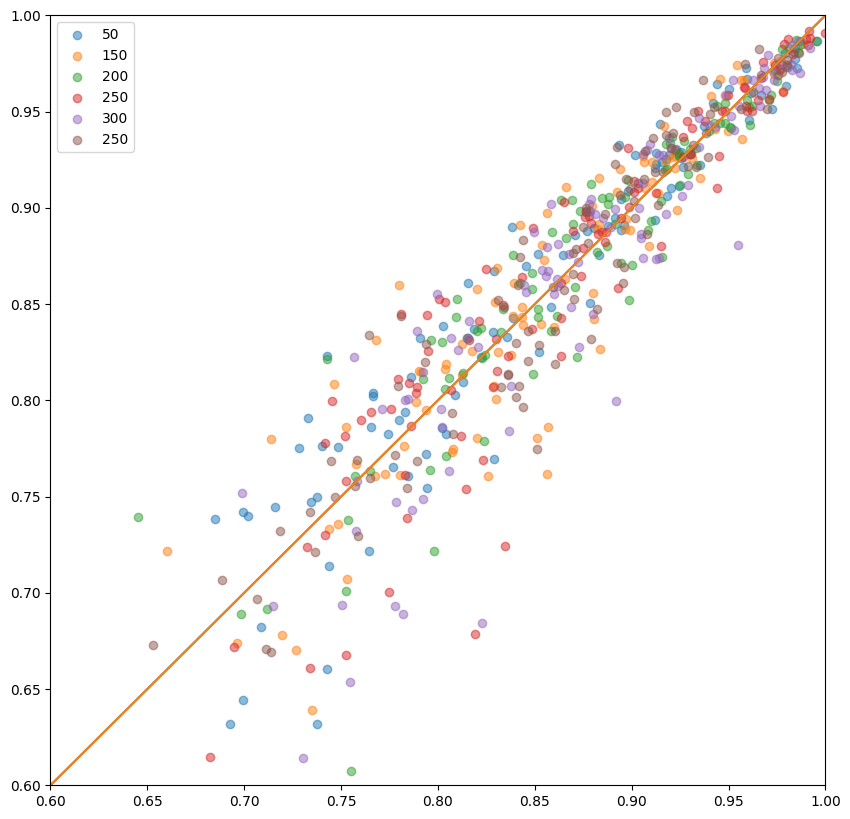

In [27]:
fig, axes = plt.subplots(figsize=(10, 10)) 

for reals, predicts, n_qubits in zip(reals_list, predicts_list, n_qubits_list):
    random_index = list(range(len(reals)))
    random.shuffle(random_index)
    random_index = random_index[:100]
    axes.scatter(predicts[random_index], reals[random_index], label = n_qubits, alpha = .5)

axes.legend() # 添加图例
axes.plot([[0,0],[1,1]])
axes.axis([0.6, 1, 0.6, 1])
plt.show()

In [37]:
n_qubits_dfs = []

for index, n_qubits in enumerate(n_qubits_list):
    
    n_gates = n_gates_list[index]
    reals = reals_list[index]
    predicts = predicts_list[index]
    
    inaccuracies = np.abs(reals - predicts)
    
    rb_predicts = .999**n_gates
    rb_inaccuracies = 

    df = pd.DataFrame(inaccuracies.reshape(len(inaccuracies), 1), columns=['inaccuracy']).assign(n_qubits = n_qubits)
    n_qubits_dfs.append(df)

cdf = pd.concat(n_qubits_dfs)           
cdf# CONCATENATE
# mdf = pd.melt(cdf, id_vars=['n_qubits'], var_name=['Number'])      # MELT
# print(mdf.head())
# mdf
# data = np.
# for r_i, qubit_num in enumerate(bug_num_ranges):
#     for c_i, alg_name in enumerate(alg_names):
#         data[r_i][c_i] = alg2n_qubit2success_rate[alg_name][qubit_num]

# df = pd.DataFrame(data, index=bug_num_ranges, columns=alg_names)

,inaccuracy,n_qubits
0,0.007410,50
1,0.004468,50
2,0.006830,50
3,0.003738,50
4,0.004282,50
...,...,...
33655,0.016470,250
33656,0.011874,250
33657,0.191774,250
33658,0.184100,250


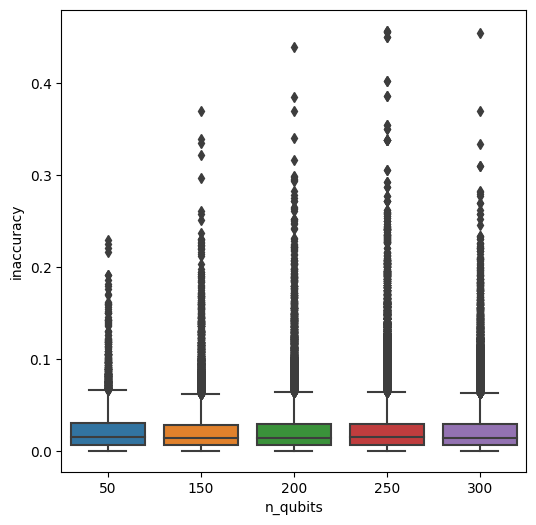

In [38]:
plt.figure(figsize=(6,6))
# sns.boxplot(x="Pclass",y="new_Fare",hue="Survived",data=df,width=0.6)
ax = sns.boxplot(x="n_qubits", y="inaccuracy", data=cdf)
plt.show()